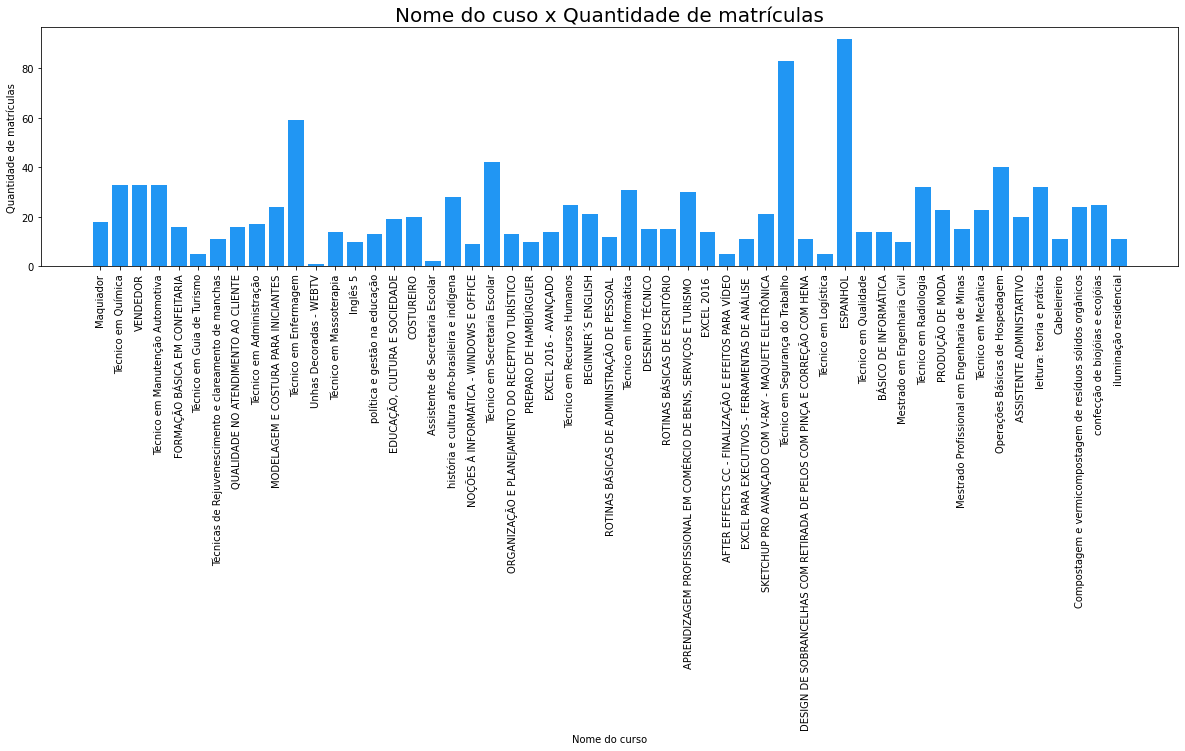

In [ ]:
import pandas as pd
# !pip install -U pandasql
import pandasql
import numpy as np
import matplotlib.pyplot as plt



def amostra(param):
  amostra = pd.read_csv(param)

  # Identificar e remover registros repetidos;
  amostra_remove= amostra.drop_duplicates()

  # (i) discriminar quais dados possuem na coluna "nome_curso"
  consulta_zero = pandasql.sqldf("Select nome_curso from amostra_remove where qtd_de_matriculas !=0")

  # (ii) filtrar os registros que possuem valor 0 (zero) na coluna "qtd_de_matriculas" e deletar esses registros;
  consulta_one = pandasql.sqldf("Select * from amostra_remove where qtd_de_matriculas !=0")

  # Salvar o novo dataframe em um arquivo CSV;
  new_file = consulta_one.to_csv('amostra-para-exercicio-new.csv')

  # Plotar um boxplot envolvendo as colunas "nome_escola" e "qtd_de_matriculas".
  consulta_two= pandasql.sqldf("Select nome_curso, qtd_de_matriculas from amostra_remove where qtd_de_matriculas !=0")
 

  eixo_x = consulta_two['nome_curso']
  eixo_y =  consulta_two['qtd_de_matriculas']

  plt.bar(eixo_x, eixo_y, color = '#2196F3')
  plt.title('Nome do cuso x Quantidade de matrículas', size = 20)
  plt.xlabel('Nome do curso')
  plt.ylabel('Quantidade de matrículas')
  plt.xticks(rotation = 90, size = 10)
  plt.subplots_adjust(bottom = 0.16, top= 0.990, left = 0.067, right = 2.7)
  plt.show()
  return new_file

amostra('amostra-para-exercicio.csv')